In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [40]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=32,
                 lr=0.1,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 7],
                 n_init_bins_list=[10, 15, 20],
                 co_occur_cutoff=2)

In [41]:
exp.data.shape

(768, 9)

In [47]:
set(exp.y)

{0, 1}

In [42]:
exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


>>> Epoch = 1
Loss = 3.139092206954956
[3, 4, 6, 4, 3, 3, 6, 3]
>>> Epoch = 2
Loss = 2.5412933826446533
[3, 4, 4, 3, 3, 3, 3, 3]
>>> Epoch = 3
Loss = 2.244597911834717
[3, 4, 4, 4, 3, 3, 6, 4]
>>> Epoch = 4
Loss = 2.250382661819458
[3, 4, 4, 4, 3, 3, 8, 3]
>>> Epoch = 5
Loss = 2.1856391429901123
[3, 4, 4, 3, 3, 3, 8, 3]
>>> Epoch = 6
Loss = 2.126595973968506
[3, 4, 4, 3, 3, 3, 7, 4]
>>> Epoch = 7
Loss = 2.102712869644165
[3, 4, 4, 3, 3, 3, 5, 4]
>>> Epoch = 8
Loss = 2.0517473220825195
[3, 4, 6, 3, 3, 3, 5, 3]
>>> Epoch = 9
Loss = 1.9290709495544434
[3, 4, 6, 3, 3, 3, 7, 3]
>>> Epoch = 10
Loss = 2.0640039443969727
[3, 4, 4, 3, 3, 3, 7, 4]
>>> Epoch = 11
Loss = 1.9193086624145508
[3, 4, 4, 3, 3, 3, 8, 3]
>>> Epoch = 12
Loss = 1.923977255821228
[3, 4, 6, 3, 3, 3, 8, 3]
>>> Epoch = 13
Loss = 1.7298555374145508
[3, 4, 4, 3, 3, 3, 8, 3]
>>> Epoch = 14
Loss = 1.9986423254013062
[3, 4, 6, 3, 3, 3, 8, 3]
>>> Epoch = 15
Loss = 1.8549636602401733
[3, 4, 6, 3, 3, 3, 9, 3]
>>> Epoch = 16
Loss = 1.9

>>> Epoch = 42
Loss = 1.8576451539993286
[3, 3, 3, 3, 3, 5, 11, 3]
>>> Epoch = 43
Loss = 1.8797659873962402
[3, 7, 3, 3, 3, 5, 11, 4]
>>> Epoch = 44
Loss = 1.9680202007293701
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 45
Loss = 1.8194680213928223
[3, 3, 5, 3, 3, 5, 11, 4]
>>> Epoch = 46
Loss = 1.9106706380844116
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 47
Loss = 1.7913986444473267
[3, 3, 5, 3, 3, 5, 11, 4]
>>> Epoch = 48
Loss = 1.9792653322219849
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 49
Loss = 1.9093310832977295
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 50
Loss = 1.900154948234558
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 51
Loss = 1.8505594730377197
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 52
Loss = 1.8602726459503174
[3, 3, 3, 3, 3, 5, 11, 4]
>>> Epoch = 53
Loss = 1.8186583518981934
[3, 3, 5, 3, 3, 5, 11, 4]
>>> Epoch = 54
Loss = 1.9340559244155884
[3, 3, 5, 3, 3, 5, 11, 4]
>>> Epoch = 55
Loss = 1.8471328020095825
[3, 3, 5, 3, 3, 5, 11, 4]
>>> Epoch = 56
Loss = 1.7776378393173218
[3, 3, 5, 3, 3, 5, 11,

>>> Epoch = 84
Loss = 1.8705805540084839
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 85
Loss = 1.9916918277740479
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 86
Loss = 1.961212158203125
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 87
Loss = 2.0127086639404297
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 88
Loss = 1.8882464170455933
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 89
Loss = 1.848009467124939
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 90
Loss = 1.936498761177063
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 91
Loss = 1.8710254430770874
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 92
Loss = 1.9774904251098633
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 93
Loss = 1.5732544660568237
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 94
Loss = 2.0224618911743164
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 95
Loss = 1.8308844566345215
[3, 7, 5, 3, 3, 5, 13, 4]
>>> Epoch = 96
Loss = 2.0521576404571533
[3, 7, 5, 3, 3, 7, 12, 4]
>>> Epoch = 97
Loss = 1.9108519554138184
[3, 7, 5, 3, 3, 7, 13, 4]
>>> Epoch = 98
Loss = 1.9046000242233276
[3, 7, 5, 3, 3, 7, 12, 4

In [43]:
result = exp.get_result()

In [44]:
result

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5,svm_acc
0,raw,0.737,0.729,0.731,0.750,0.723,0.063144,0.764,0.771,0.771,0.771,0.771,8,0.651,0.745,0.764,0.747,0.710,0.771
1,sb_10,0.729,0.731,0.707,0.711,0.716,0.047129,0.747,0.751,0.750,0.749,0.745,32,0.731,0.690,0.689,0.703,0.702,0.746
2,sb_15,0.741,0.727,0.692,0.707,0.702,0.061761,0.744,0.740,0.741,0.742,0.740,37,0.732,0.707,0.699,0.704,0.694,0.745
3,sb_20,0.721,0.730,0.730,0.724,0.708,0.044046,0.763,0.762,0.759,0.759,0.763,43,0.734,0.707,0.718,0.727,0.700,0.753
4,ew_3,0.745,0.747,0.749,0.742,0.731,0.127316,0.729,0.728,0.728,0.727,0.723,24,0.716,0.741,0.746,0.744,0.738,0.738
5,ef_3,0.762,0.744,0.723,0.721,0.703,0.086221,0.745,0.750,0.748,0.748,0.749,27,0.727,0.693,0.708,0.702,0.684,0.746
6,ew_5,0.730,0.725,0.737,0.742,0.742,0.063161,0.758,0.767,0.768,0.770,0.768,40,0.737,0.740,0.731,0.742,0.714,0.737
7,ef_5,0.732,0.728,0.747,0.734,0.732,0.000386,0.758,0.745,0.744,0.740,0.745,44,0.744,0.711,0.741,0.742,0.716,0.744
8,ew_7,0.717,0.728,0.737,0.734,0.741,0.107147,0.754,0.764,0.767,0.770,0.768,56,0.764,0.738,0.731,0.729,0.723,0.754
9,ef_7,0.723,0.732,0.724,0.727,0.715,0.000712,0.760,0.751,0.744,0.738,0.734,57,0.750,0.736,0.749,0.747,0.707,0.753


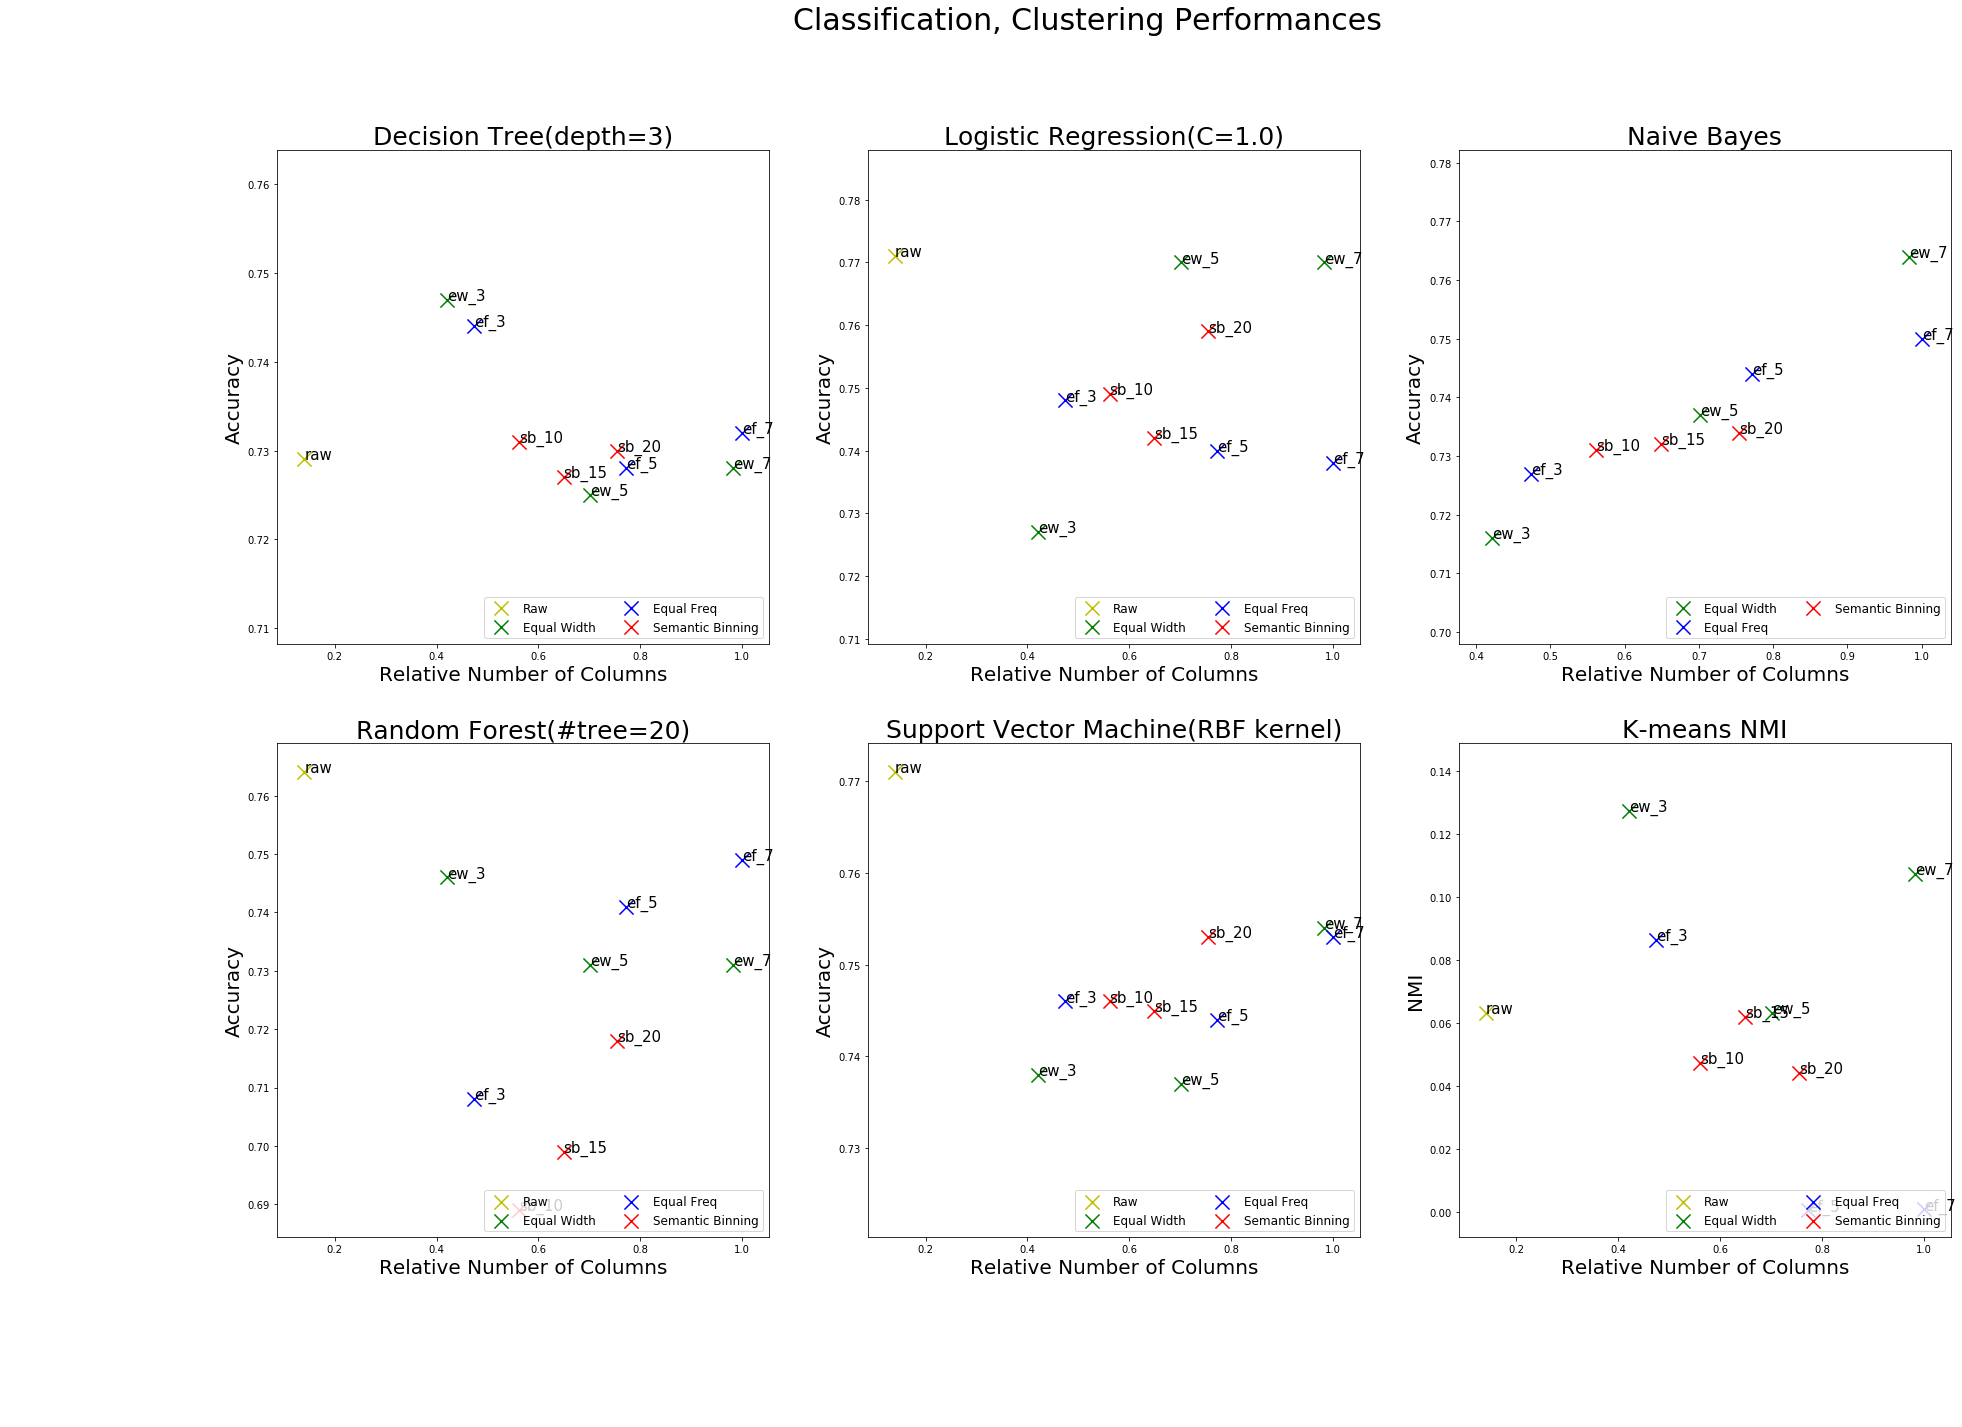

In [45]:
exp.plot_model_comparison_chart(result)

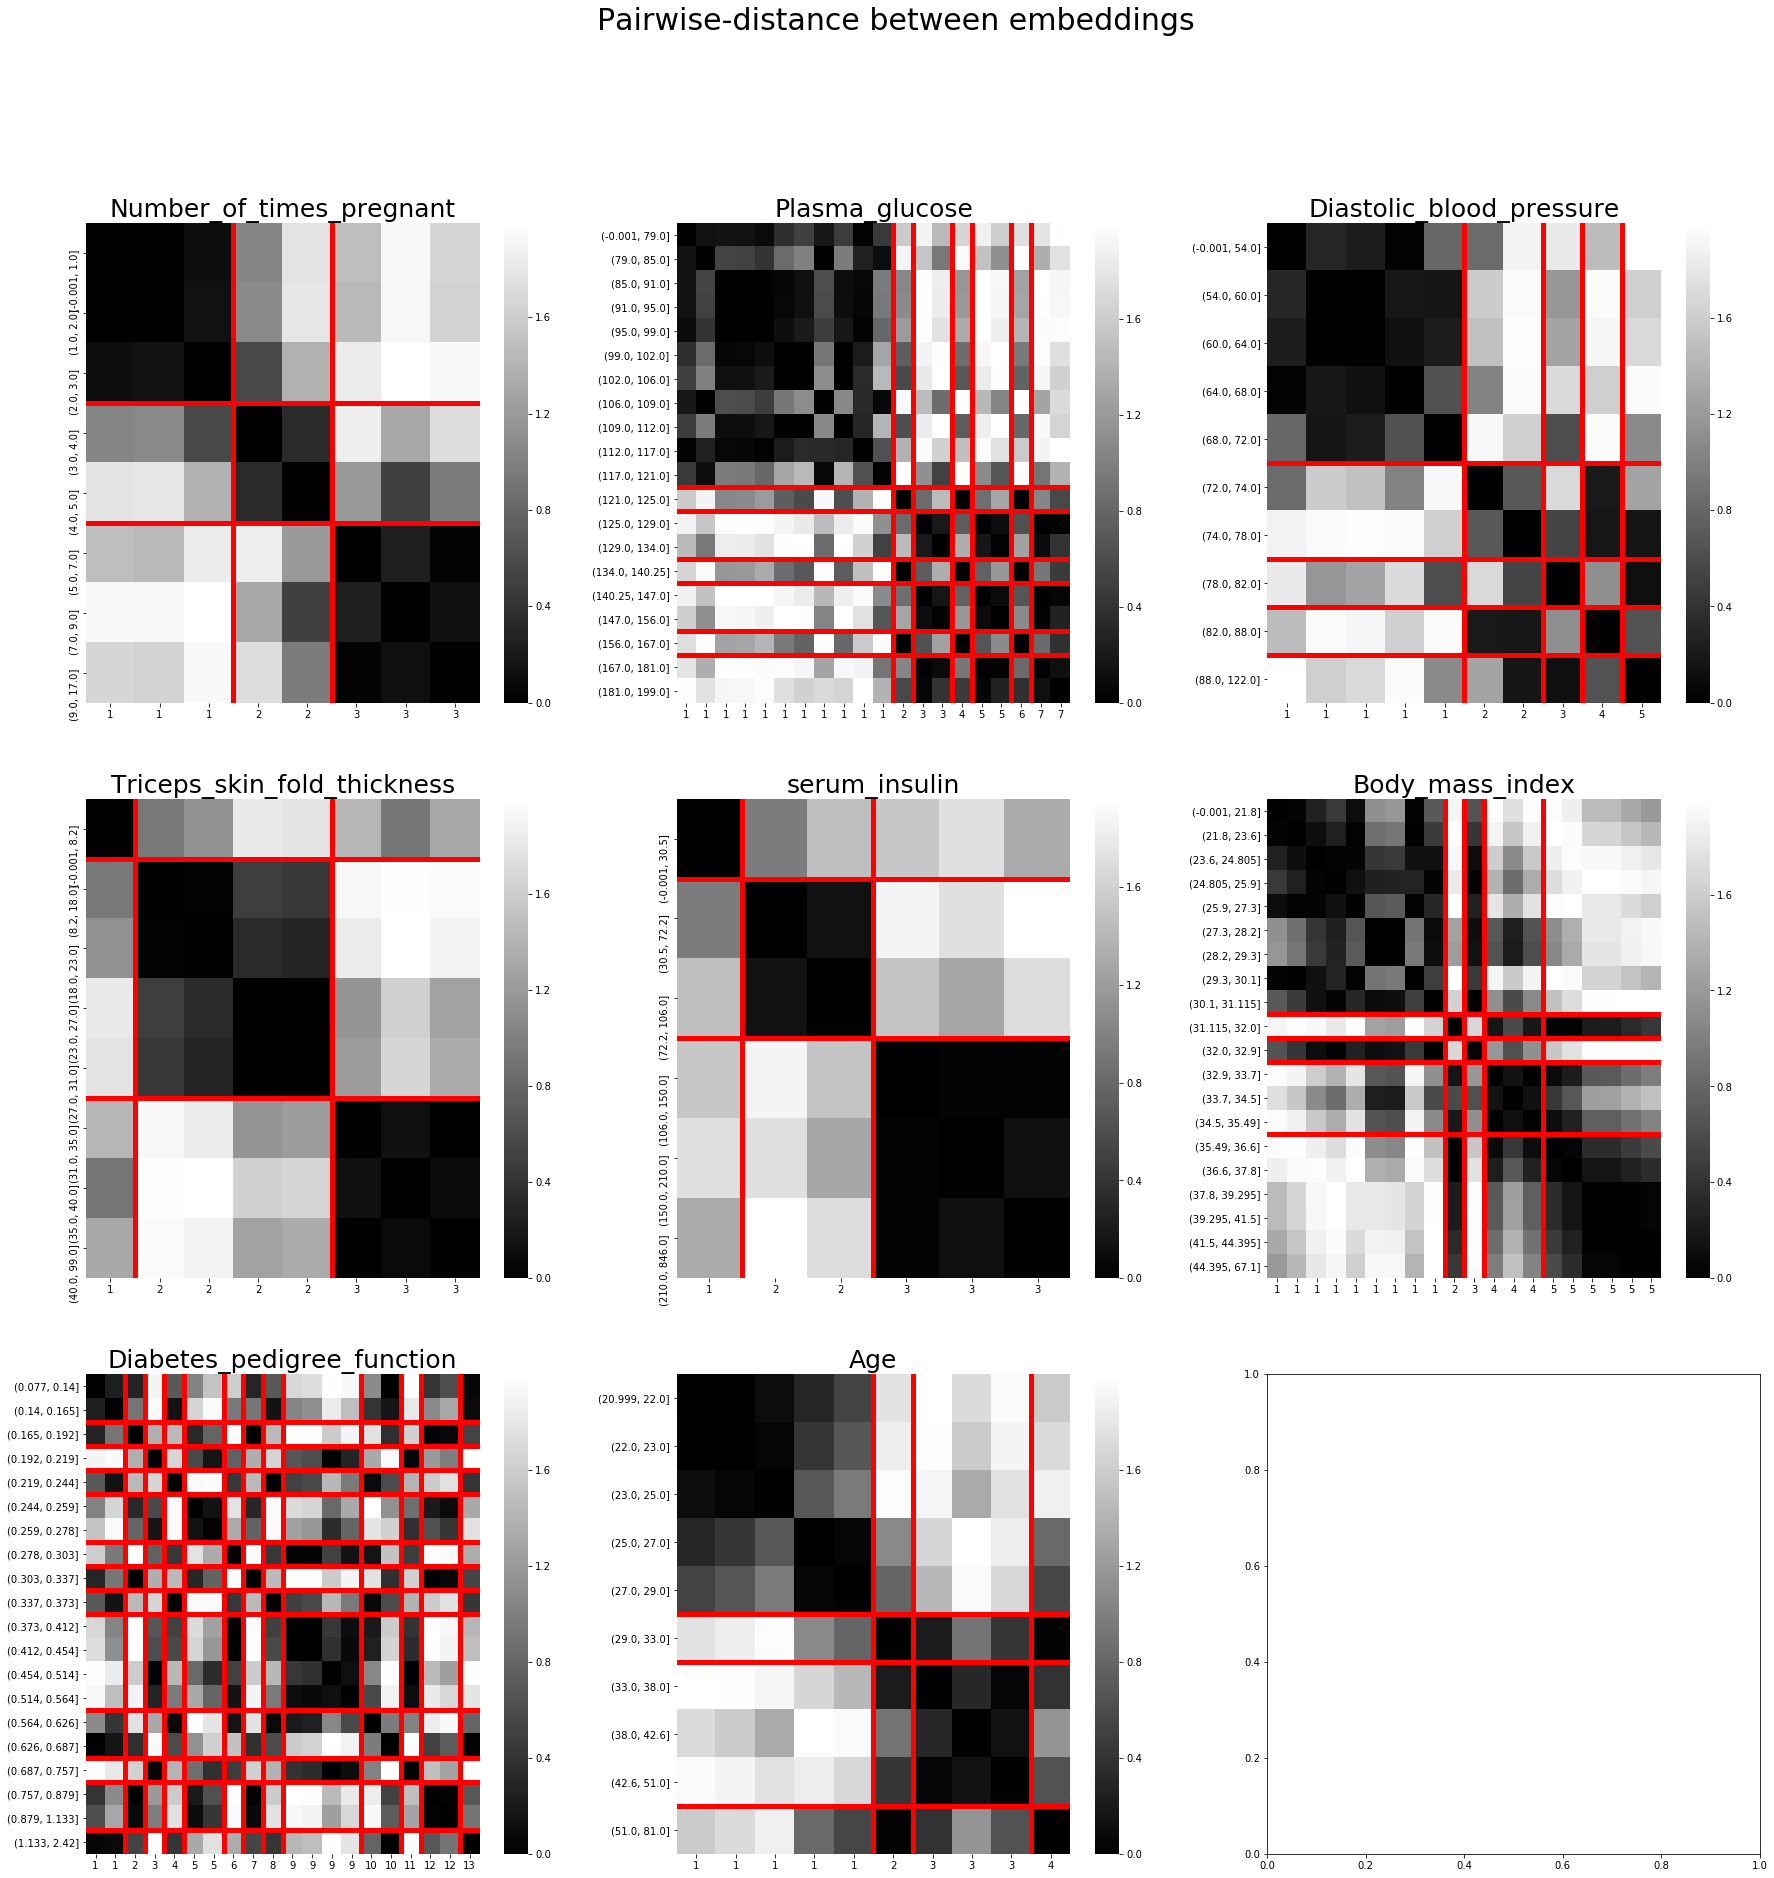

In [46]:
exp.plot_pairwise_distance_matrices()